<a href="https://colab.research.google.com/github/Shaillucky/Time_Series_Analysis-Using-LSTM-and-Classical-Models/blob/main/Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
!pip install --upgrade pandas-datareader
!pip install -q yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [122]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

import datetime as dt
import pandas_datareader as web

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

## **Downloading the dataset from the Yahoo using yfinance library for the past one year till date of now**

In [123]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [124]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [125]:
for company, com_name in zip(company_list, company_name):
  company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-06-01,122.255997,125.179001,120.622498,121.683998,121.683998,127528000,AMAZON
2022-06-02,121.683998,125.610001,120.044998,125.511002,125.511002,100560000,AMAZON
2022-06-03,124.199997,124.400002,121.046501,122.349998,122.349998,97604000,AMAZON
2022-06-06,125.250000,128.990005,123.809998,124.790001,124.790001,135269000,AMAZON
2022-06-07,122.010002,124.099998,120.629997,123.000000,123.000000,85156700,AMAZON
2022-06-08,122.610001,123.750000,120.750000,121.180000,121.180000,64926600,AMAZON
2022-06-09,119.989998,121.300003,116.099998,116.150002,116.150002,67029800,AMAZON
2022-06-10,113.419998,114.500000,109.050003,109.650002,109.650002,87266000,AMAZON
2022-06-13,104.190002,106.540001,101.860001,103.669998,103.669998,99277700,AMAZON


## **Statistical Summary of the dataset**

In [126]:
# Summary Stats 

AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,155.757115,157.640396,154.030474,155.910554,155.463548,8.927009e+07
std,13.055267,13.252575,12.742800,12.981748,13.057895,2.669191e+07
min,129.800003,130.600006,128.460007,129.639999,128.903534,4.100000e+07
25%,146.190002,147.710007,145.179993,146.139999,145.539993,6.990710e+07
50%,151.889999,154.630005,150.380005,152.059998,151.870819,8.618550e+07
75%,167.479996,169.679993,165.500000,166.559998,166.315643,1.041327e+08
max,182.630005,182.940002,179.119995,182.009995,181.511703,1.954327e+08


### **General Information about the dataset like Dtype, Column etc.**



In [127]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-06-15 to 2022-06-14
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          253 non-null    float64
 1   High          253 non-null    float64
 2   Low           253 non-null    float64
 3   Close         253 non-null    float64
 4   Adj Close     253 non-null    float64
 5   Volume        253 non-null    int64  
 6   company_name  253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


## *Plotting the historical view of the closing price for the different stocks*

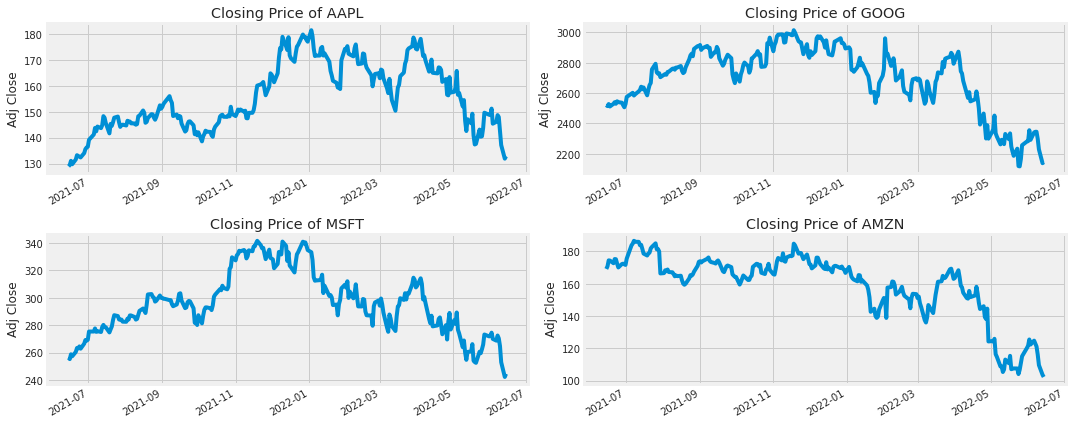

In [128]:
 

plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()


## *Plotting the total volume of stock being traded each day*

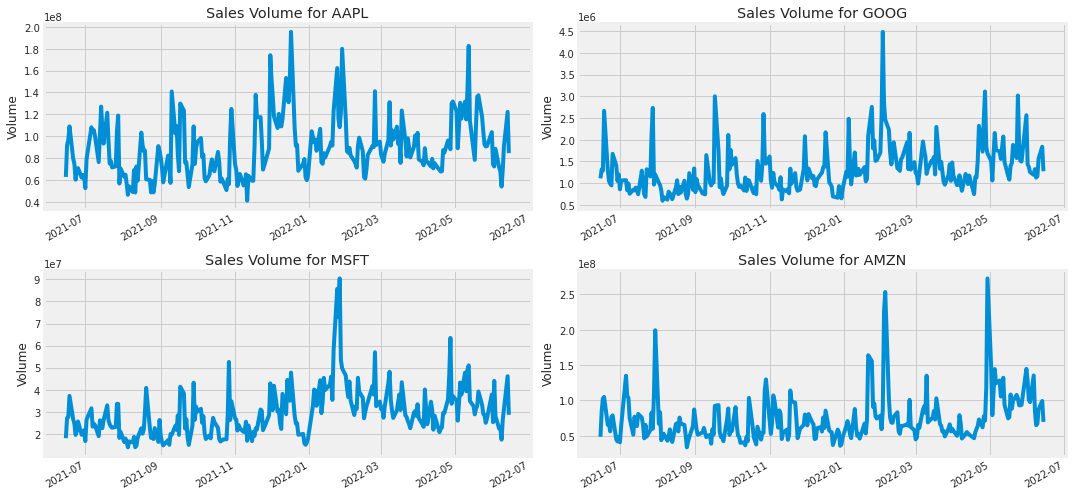

In [129]:
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

### **Moving Average for the various stocks**

In [130]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [131]:
print(GOOG.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


## Plotting the Moving Average for the different days 20, 20, 50 along with Adjacent Closing Price**




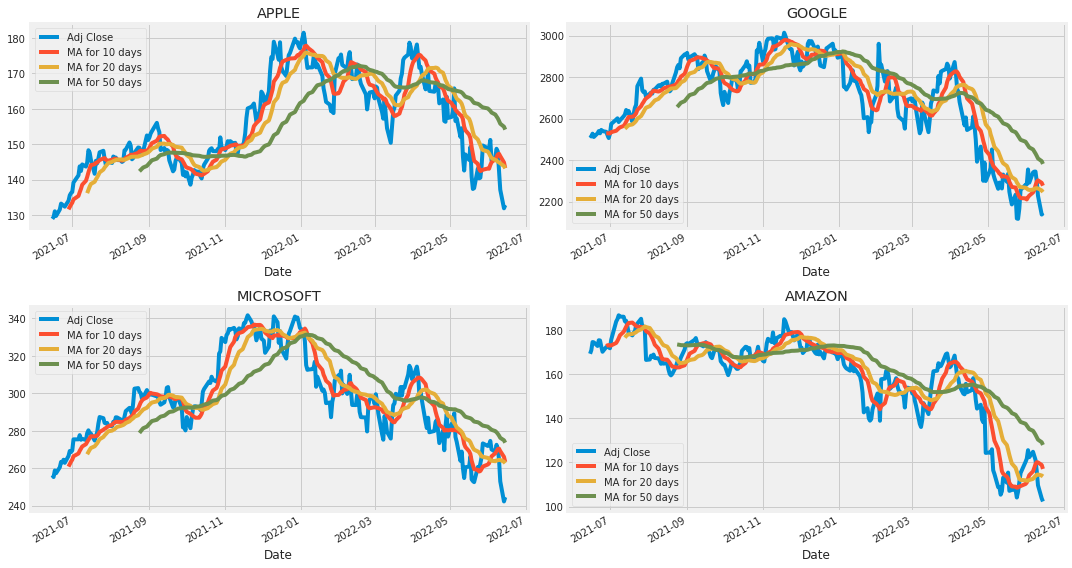

In [132]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

## Now let's analyze the risk of the stock. In order to do that we need to find the **Daily Return of the stock on average** so that we can observe the daily changes on the stock

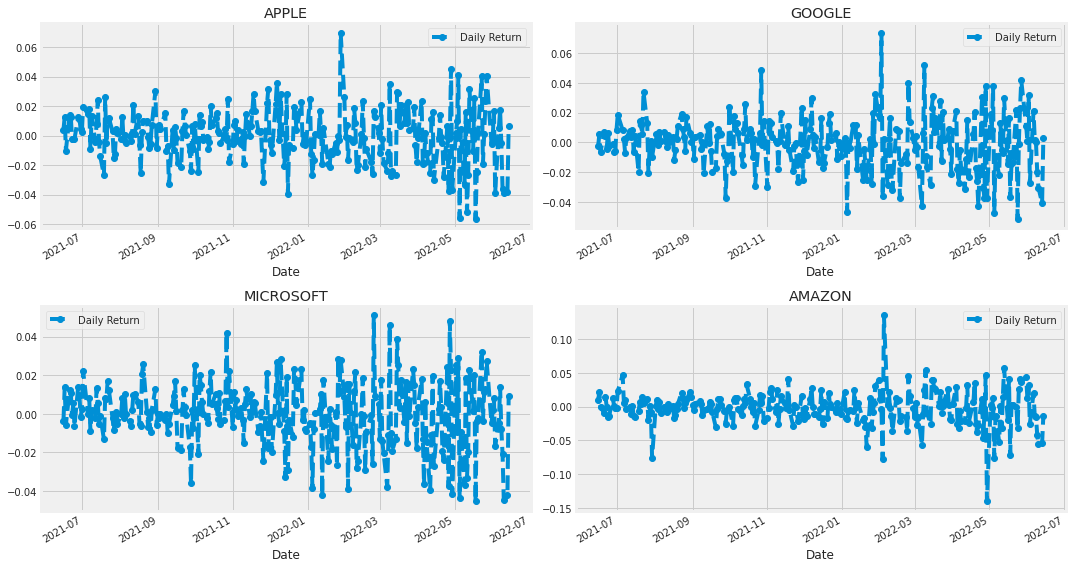

In [133]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()


## Plotting the overall daily average return using the histogram using seaborn

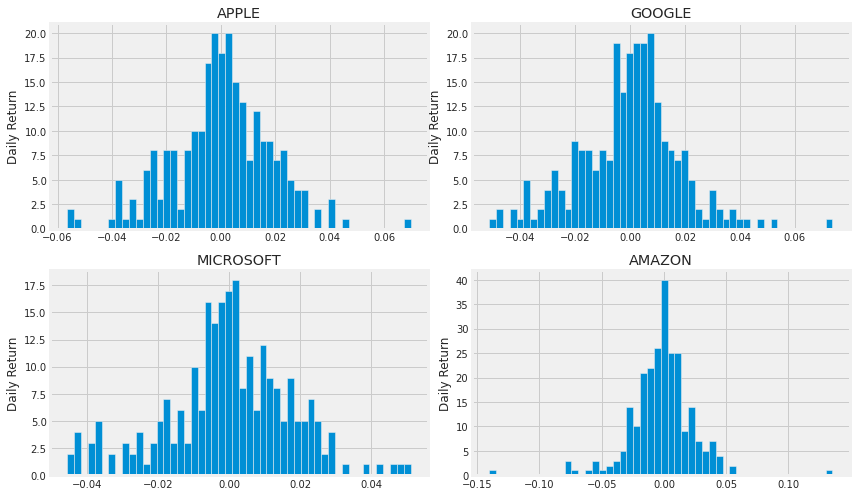

In [134]:
plt.figure(figsize=(12, 7))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

## **Correlation between the different stocks closing prices**

In [135]:
## Getting all the cloosing price for the stock list we have 

closing_df  = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

## Let's take a quick look
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-15,128.903549,2520.659912,256.267456,169.156494
2021-06-16,129.410645,2513.929932,255.295364,170.762497
2021-06-17,131.041321,2527.419922,258.786865,174.462006
2021-06-18,129.718887,2511.350098,257.328766,174.345001
2021-06-21,131.548431,2529.100098,260.502869,172.697998


## As we have all the closing price, now let's get the daily return for all the stocks

In [136]:
# Makeing a new dataframe

tech_rets = closing_df.pct_change()
tech_rets.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-06-15,NaN,NaN,NaN,NaN
2021-06-16,0.003934,-0.002670,-0.003793,0.009494
2021-06-17,0.012601,0.005366,0.013676,0.021665
2021-06-18,-0.010092,-0.006358,-0.005634,-0.000671
2021-06-21,0.014104,0.007068,0.012335,-0.009447


## Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.


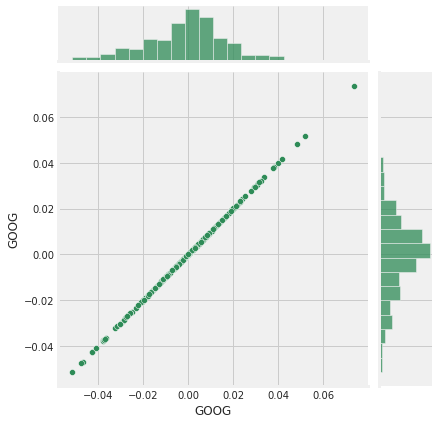

In [137]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

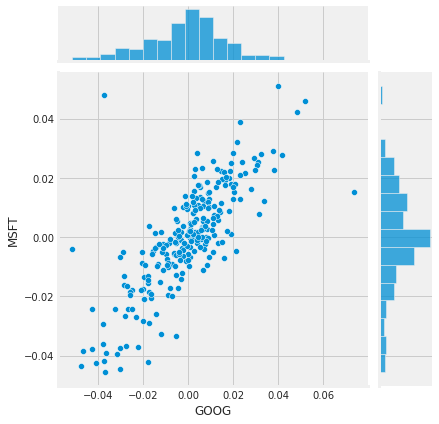

In [138]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

## So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur. 

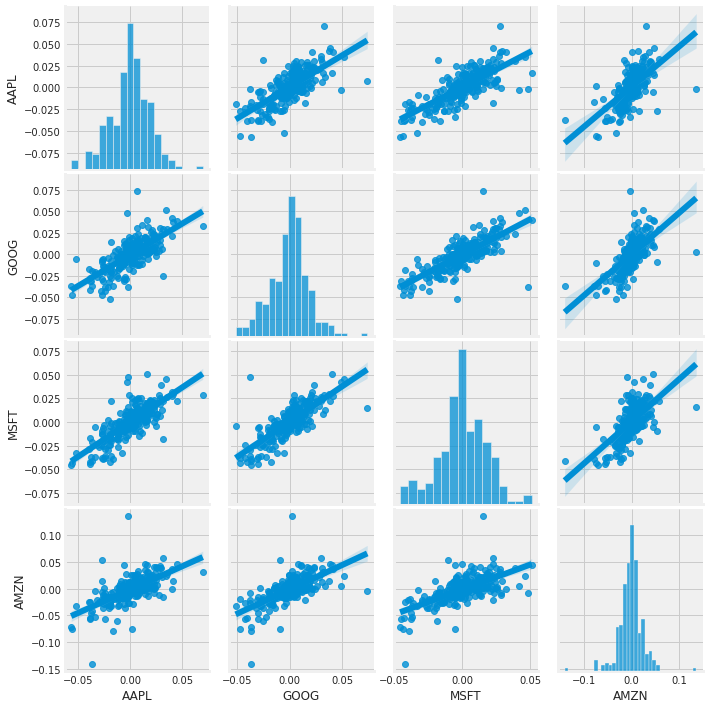

In [139]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

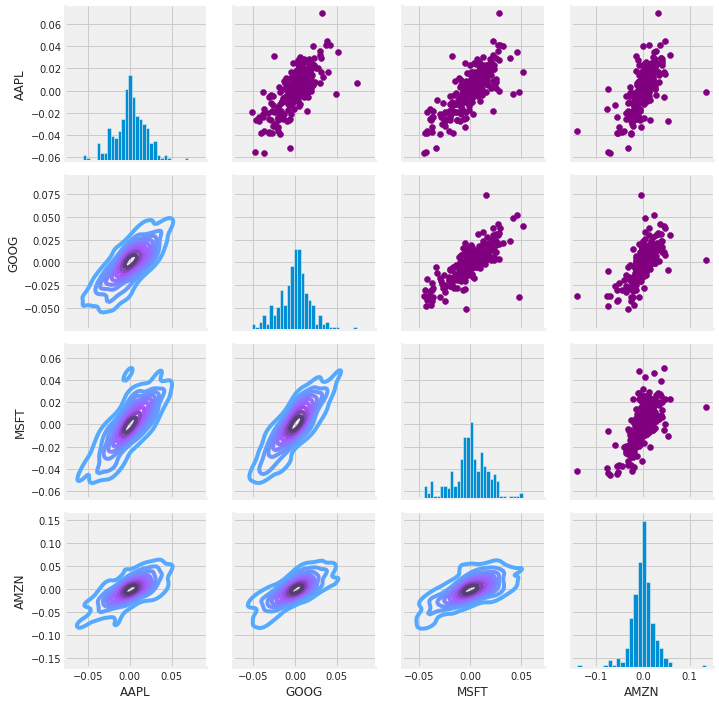

In [140]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

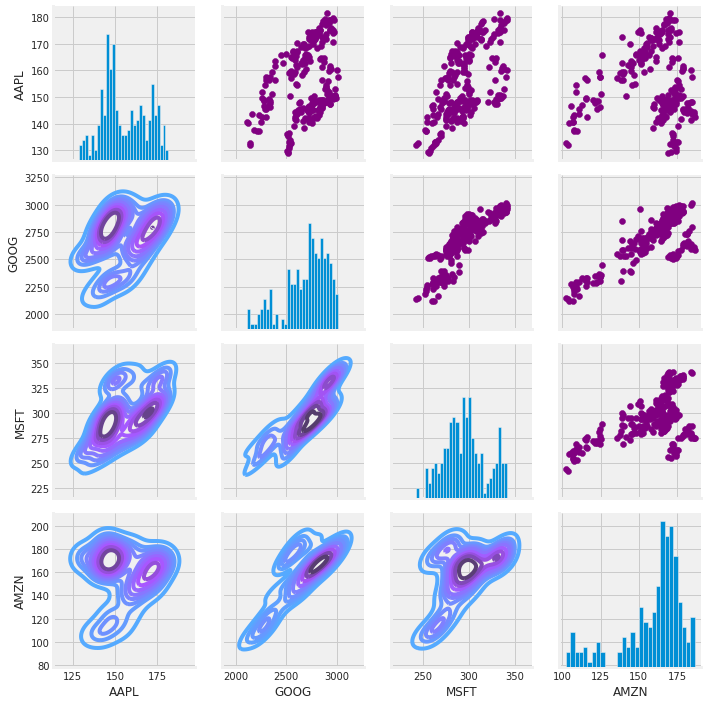

In [141]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

### Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

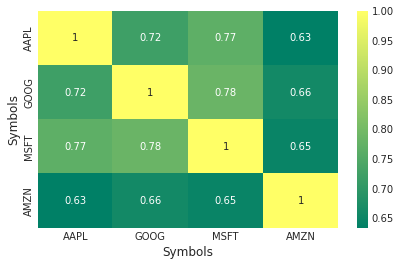

In [142]:
# Let's use sebron for a quick correlation plot for the daily returns
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

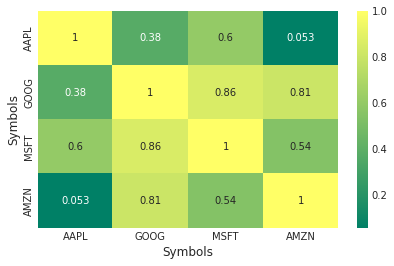

In [143]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

#### *Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.*

## **Predicting the closing price of the stock APPLE inc**

In [144]:
# Getting the data for the last one year from the current date
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557467
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624950
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765114
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898555
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878097
...,...,...,...,...,...,...
2022-06-08,149.869995,147.460007,148.580002,147.960007,53950200.0,147.960007
2022-06-09,147.949997,142.529999,147.080002,142.639999,69473000.0,142.639999
2022-06-10,140.759995,137.059998,140.279999,137.130005,91437900.0,137.130005


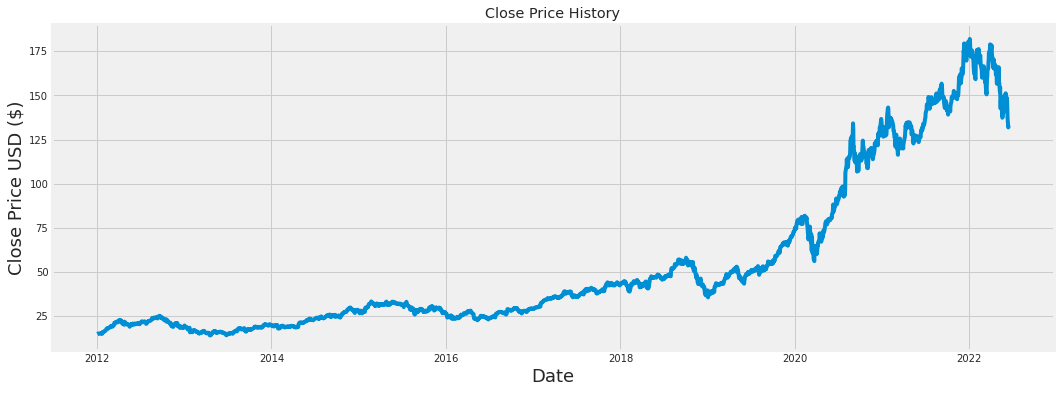

In [145]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [146]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2499

In [147]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.73295654],
       [0.70171816],
       [0.70695425]])

In [148]:
def load_data(company, start, end):
    data = web.DataReader(company, 'yahoo', start, end)
    return data

In [149]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
#model.add(Dropout(0.2))

model.add(LSTM(64, return_sequences=False))
#model.add(Dropout(0.2))

model.add(Dense(25))
model.add(Dense(1))

model.add(Dense(units=1))



In [151]:
# Compile the model
model.summary()
model.compile(optimizer='adam', 
              loss='mean_squared_error')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 128)           66560     
                                                                 
 lstm_3 (LSTM)               (None, 64)                49408     
                                                                 
 dense_3 (Dense)             (None, 25)                1625      
                                                                 
 dense_4 (Dense)             (None, 1)                 26        
                                                                 
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 117,621
Trainable params: 117,621
Non-trainable params: 0
_________________________________________________________________


In [152]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
2439/2439 [==============================] - 89s 35ms/step - loss: 0.0011
Epoch 2/5
2439/2439 [==============================] - 84s 35ms/step - loss: 4.2796e-04
Epoch 3/5
2439/2439 [==============================] - 84s 34ms/step - loss: 3.3744e-04
Epoch 4/5
2439/2439 [==============================] - 84s 34ms/step - loss: 3.6036e-04
Epoch 5/5
2439/2439 [==============================] - 83s 34ms/step - loss: 2.2059e-04


In [153]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]


# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

4.4024817090242

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


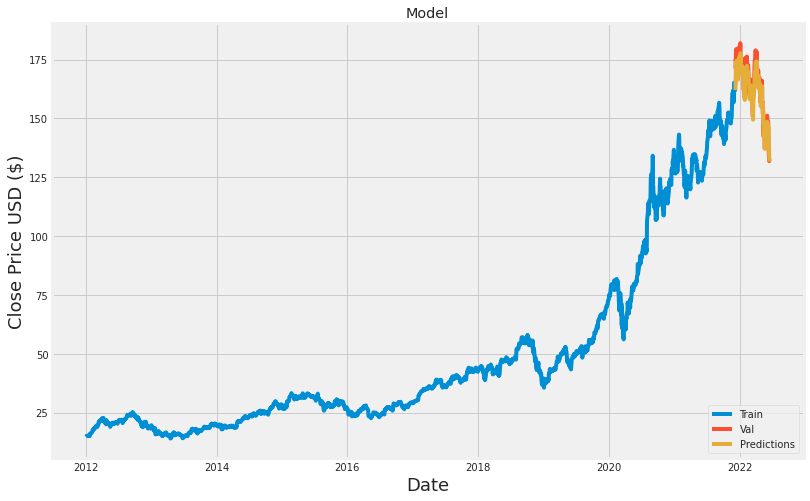

In [169]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(12,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [155]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-12-07,171.179993,162.059906
2021-12-08,175.080002,167.582764
2021-12-09,174.559998,170.945496
2021-12-10,179.449997,170.047363
2021-12-13,175.740005,174.466400
...,...,...
2022-06-08,147.960007,146.646103
2022-06-09,142.639999,146.082977
2022-06-10,137.130005,141.212616


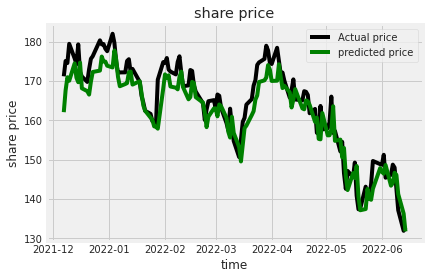

In [156]:
plt.plot(valid['Close'], color='black', label="Actual price")
plt.plot(valid['Predictions'], color= 'green', label="predicted price")
plt.title("share price")
plt.xlabel("time")
plt.ylabel("share price")
plt.legend()
plt.show()

## **Prophet Introduction**: 
Prophet is Facebook's library for time series forecasting. In my opinion, Prophet works best with datasets that are higely influenced by seasonality (electricity bills, restaurant visitors etc.) However, I wanted to show the simplicity of using Prophet for simple forecasting which is the main aim of this part


#### **Steps for using Prophet**

* Make sure you replace closing price for y and date for ds.
* Fit that dataframe to Prophet in order to detect future patterns.
* Predict the upper and lower prices of the closing price.

In [157]:
from fbprophet import Prophet
# Statsmodels widely known for forecasting than Prophet
import statsmodels.api as sm
from scipy import stats

In [158]:
# Getting the data for the last one year from the current date
df = DataReader('AAPL', data_source='yahoo', start='2012-01-01', end=datetime.now())
# Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557468
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624951
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765116
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898555
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878098
...,...,...,...,...,...,...
2022-06-08,149.869995,147.460007,148.580002,147.960007,53950200.0,147.960007
2022-06-09,147.949997,142.529999,147.080002,142.639999,69473000.0,142.639999
2022-06-10,140.759995,137.059998,140.279999,137.130005,91437900.0,137.130005


In [159]:
df.reset_index('Date', inplace=True)

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2630 non-null   datetime64[ns]
 1   High       2630 non-null   float64       
 2   Low        2630 non-null   float64       
 3   Open       2630 non-null   float64       
 4   Close      2630 non-null   float64       
 5   Volume     2630 non-null   float64       
 6   Adj Close  2630 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 144.0 KB


In [161]:


# Drop the columns
ph_df= df.drop(['Open', 'High', 'Low','Volume','Adj Close'], axis=1)
ph_df.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

ph_df.head()

,ds,y
0,2012-01-03,14.686786
1,2012-01-04,14.765714
2,2012-01-05,14.929643
3,2012-01-06,15.085714
4,2012-01-09,15.061786


In [162]:
ph_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2630 non-null   datetime64[ns]
 1   y       2630 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 41.2 KB


In [163]:
m= Prophet()
m.fit(ph_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [164]:
# Create Future dates
future_prices = m.make_future_dataframe(periods=365)

# Predict Prices
forecast = m.predict(future_prices)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2990,2023-06-10,210.496074,198.723542,221.646553
2991,2023-06-11,210.771333,198.855484,221.940159
2992,2023-06-12,214.099913,201.504495,225.793331
2993,2023-06-13,214.500443,202.260356,225.246477
2994,2023-06-14,214.864574,203.206304,226.210021


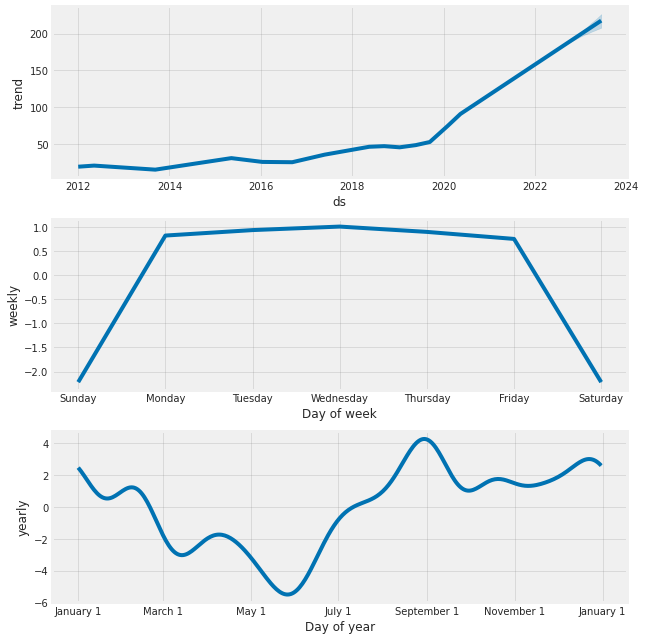

In [165]:
fig2 = m.plot_components(forecast)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


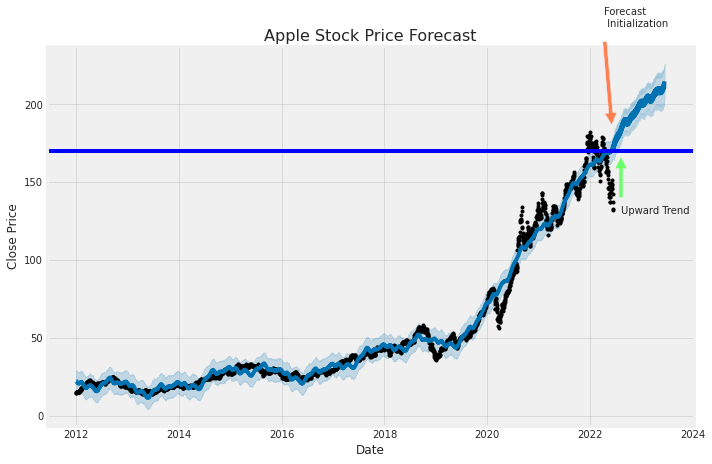

In [166]:
import matplotlib.dates as mdates

# Dates
starting_date = dt.datetime(2022, 4, 7)
starting_date1 = mdates.date2num(starting_date)
trend_date = dt.datetime(2022, 8, 8)
trend_date1 = mdates.date2num(trend_date)

pointing_arrow = dt.datetime(2022, 6, 10)
pointing_arrow1 = mdates.date2num(pointing_arrow)

# Learn more Prophet tomorrow and plot the forecast for amazon.
fig = m.plot(forecast)
ax1 = fig.add_subplot(111)
ax1.set_title("Apple Stock Price Forecast", fontsize=16)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("Close Price", fontsize=12)

# Forecast initialization arrow
ax1.annotate('Forecast \n Initialization', xy=(pointing_arrow1, 180), xytext=(starting_date1,250),
            arrowprops=dict(facecolor='#ff7f50', shrink=0.1),
            )

# Trend emphasis arrow
ax1.annotate('Upward Trend', xy=(trend_date1, 170), xytext=(trend_date1,130),
            arrowprops=dict(facecolor='#6cff6c', shrink=0.1),
            )

ax1.axhline(y=170, color='b', linestyle='-')

plt.show()